# Extract images from pdf file

In [1]:
!pip install PyMuPDF Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.9 MB/s eta 0:00:00


In [2]:
import os
import fitz  # PyMuPDF
import io
from PIL import Image

# Output directory for the extracted images
output_dir = "images"
# Desired output image format
output_format = "png"
# Minimum width and height for extracted images
min_width = 16
min_height = 16
# Create the output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [3]:
!wget https://github.com/smmss79/DIP_2023/raw/main/HW2/DIP140102_HW2.pdf

--2023-05-01 09:29:28--  https://github.com/smmss79/DIP_2023/raw/main/HW2/DIP140102_HW2.pdf
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/smmss79/DIP_2023/main/HW2/DIP140102_HW2.pdf [following]
--2023-05-01 09:29:29--  https://raw.githubusercontent.com/smmss79/DIP_2023/main/HW2/DIP140102_HW2.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131850 (129K) [application/octet-stream]
Saving to: ‘DIP140102_HW2.pdf’

DIP140102_HW2.pdf   100%[===================>] 128.76K  --.-KB/s    in 0.03s   

2023-05-01 09:29:29 (4.84 MB/s) - ‘DIP140102_HW2.pdf’ saved [131850/131850]



In [4]:
# file path you want to extract images from
file = "/content/DIP140102_HW2.pdf"
# open the file
pdf_file = fitz.open(file)

In [5]:

# Iterate over PDF pages
for page_index in range(len(pdf_file)):
    # Get the page itself
    page = pdf_file[page_index]
    # Get image list
    image_list = page.get_images(full=True)
    # Print the number of images found on this page
    if image_list:
        print(f"[+] Found a total of {len(image_list)} images in page {page_index}")
    else:
        print(f"[!] No images found on page {page_index}")
    # Iterate over the images on the page
    for image_index, img in enumerate(image_list, start=1):
        # Get the XREF of the image
        xref = img[0]
        # Extract the image bytes
        base_image = pdf_file.extract_image(xref)
        image_bytes = base_image["image"]
        # Get the image extension
        image_ext = base_image["ext"]
        # Load it to PIL
        image = Image.open(io.BytesIO(image_bytes))
        # Check if the image meets the minimum dimensions and save it
        if image.width >= min_width and image.height >= min_height:
            image.save(
                open(os.path.join(output_dir, f"image{page_index + 1}_{image_index}.{output_format}"), "wb"),
                format=output_format.upper())
        else:
            print(f"[-] Skipping image {image_index} on page {page_index} due to its small size.")

[+] Found a total of 4 images in page 0


# سوال اول

 در شکل زیر، تصویر آنژیوگرافی مربوط به شبکیه چشم را در نظر بگبرید. یکبار تمام سطوح موجود در آن را معکوس 
نمائید. بار دیگر فقط بخشی از سطوح خاکستری آن را معکویس نمائید تا هم ضایعه و هم رگ های موجود در تصویر 
آنژیوگرافی معکوس بهتر نمایان شوند؟ (سطوح خاکستری مناسب برای معکوس کردن را خودتان تعیین نمائید)

## Visualization

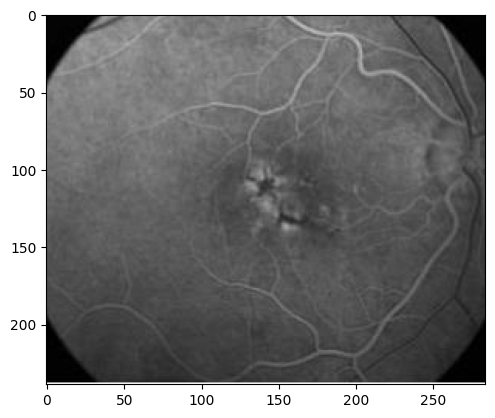

In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


IMAGE1_PATH ="/content/images/image1_1.png"
image1 = cv2.imread(IMAGE1_PATH,0)
plt.imshow(image1,cmap = "gray")
plt.show()

In [7]:
image1.shape

(239, 284)

##Invert all pixels

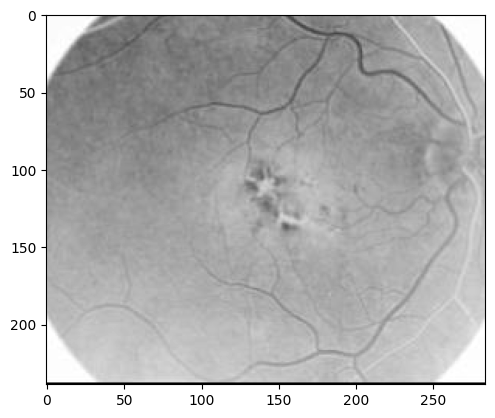

In [8]:
inverse = 255- image1
plt.imshow(inverse,cmap = "gray")
plt.show()

## Invert based on each pixel value

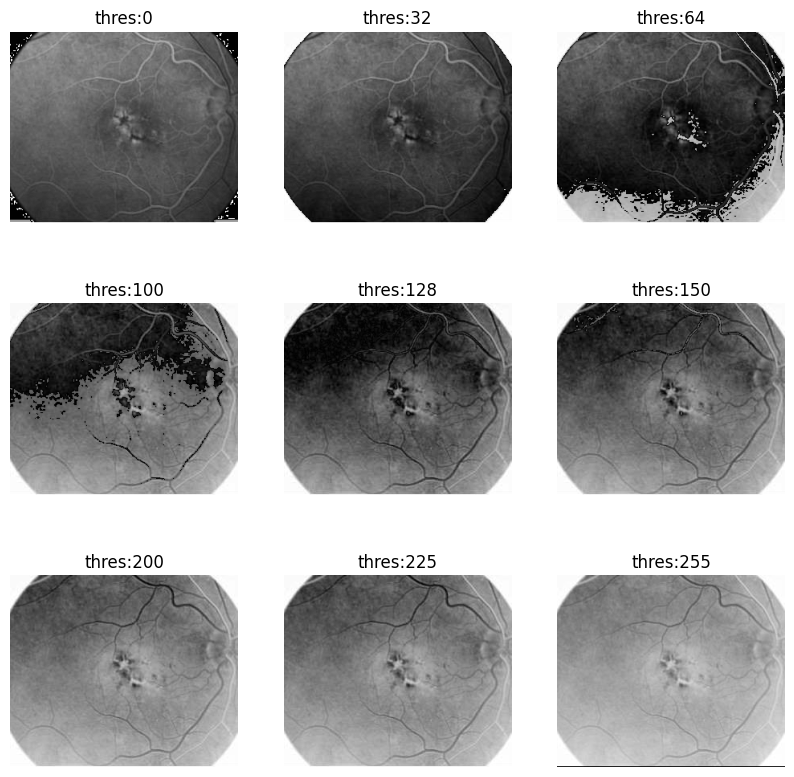

In [9]:
thresholds = [0, 32, 64, 100, 128, 150, 200, 225, 255]
rows, cols = 3, 3
plt.figure(figsize=(10,10))
for i,threshold in zip( range(1,len (thresholds)+1 ), thresholds):
    plt.subplot (rows, cols, i)
    plt.axis (False)
    plt.title("thres:"+str(threshold))
    masked = [ [ (pixel if pixel > threshold else 255-pixel) for pixel in row ] for row in image1]
    plt.imshow(masked,cmap = "gray")
plt.show()

# سوال دوم

دو تصویر نشان داده شده در شکل زیر را در نظر بگیرید، 20 مقدار گاما از 0.4 تا 2.3 با گام 0.1 به هر یک از این دو 
تصویر اعمال نمائید. با این کار به ازای هر تصویر، 20 تصویر با روشنایی متفاوت بدست می آید. مقدار گامای مناسب را 
برای هر یک از این دو تصویر به دست آورید؟

##Visualization

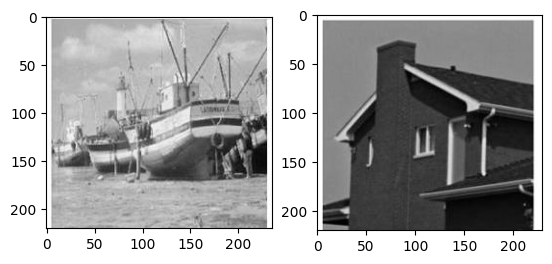

In [10]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


IMAGE2_PATH = "/content/images/image1_2.png"
image2 = cv2.imread(IMAGE2_PATH,0)
image2_1 = image2[:220,5:240]
image2_2 = image2[:220,270:]
plt.subplot(1,2,1)
plt.imshow(image2_1,cmap = "gray")
plt.subplot(1,2,2)
plt.imshow(image2_2,cmap = "gray")
plt.show()

## Define a function for applying gamma correction

In [11]:
def gammaCorrection (image,gamma):
    out = np.zeros_like(image)
    for i in range (len(image)):
        for j in range (len(image[0])):

            out[i][j] = image[i][j]**(1/gamma)
    return out

##Define gammas list

In [12]:
gammas = np.arange(0.4,2.4,0.1)

## Gamma correction on first image

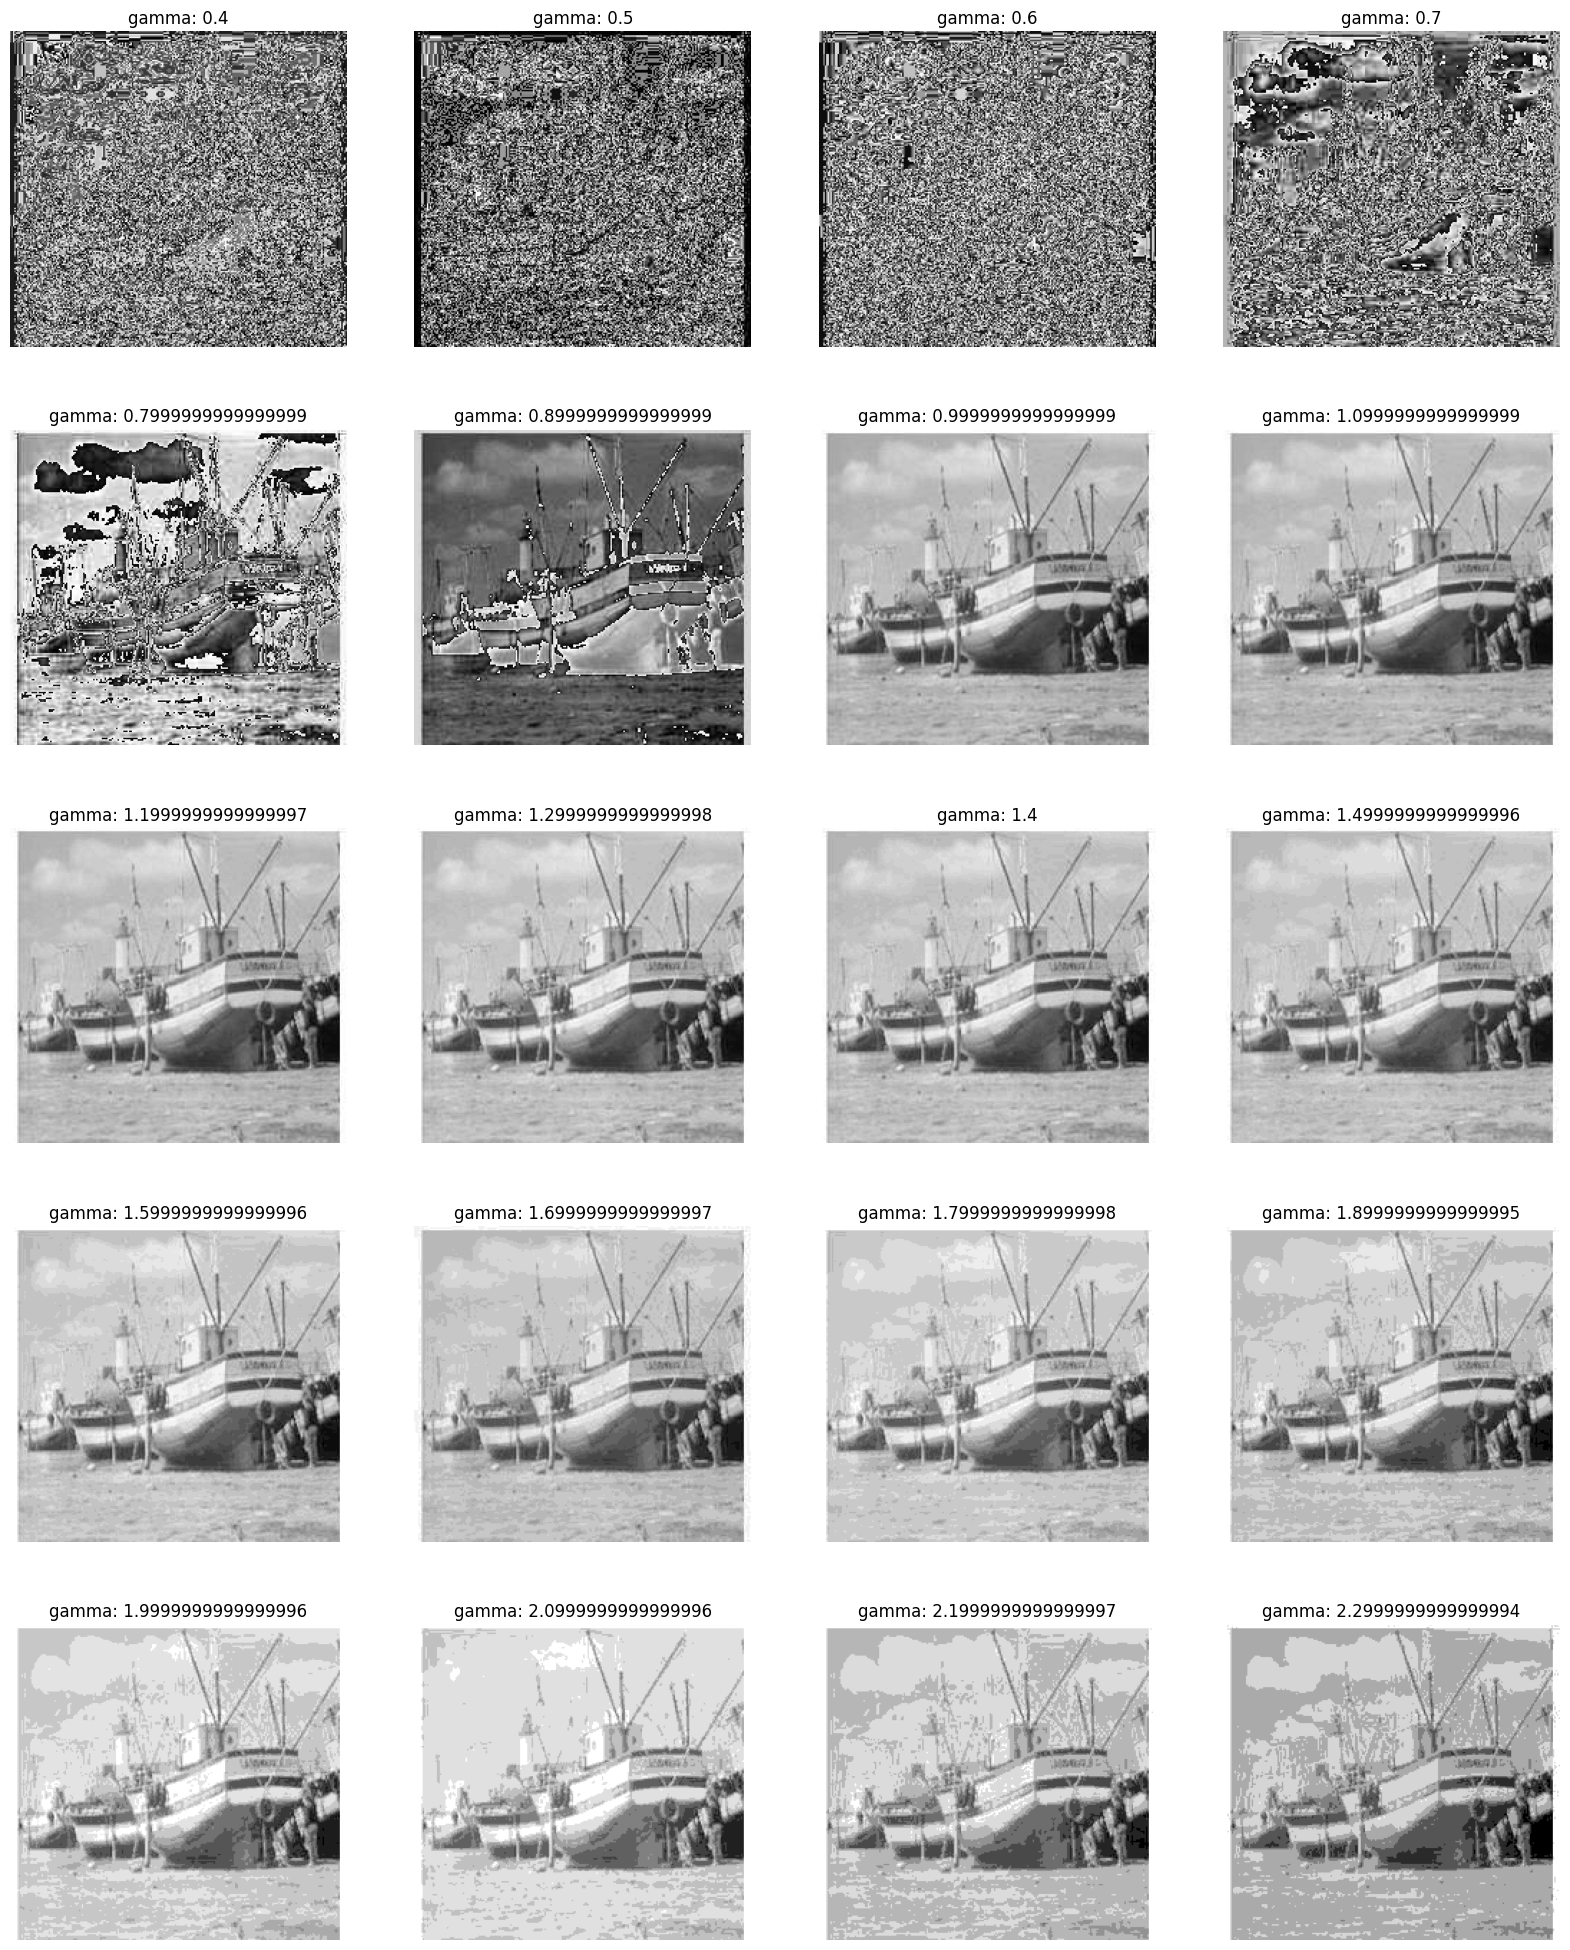

In [13]:
rows, cols = 5, 4
plt.figure(figsize=(20,25))
for i,gamma in zip( range(1,len (gammas)+1 ), gammas):
    plt.subplot (rows, cols, i)
    plt.axis (False)
    plt.title("gamma: "+str(gamma))
    temp_image = gammaCorrection(image2_1,gamma)
    plt.imshow(temp_image,cmap = "gray")
plt.show()

## Gamma correction on second image

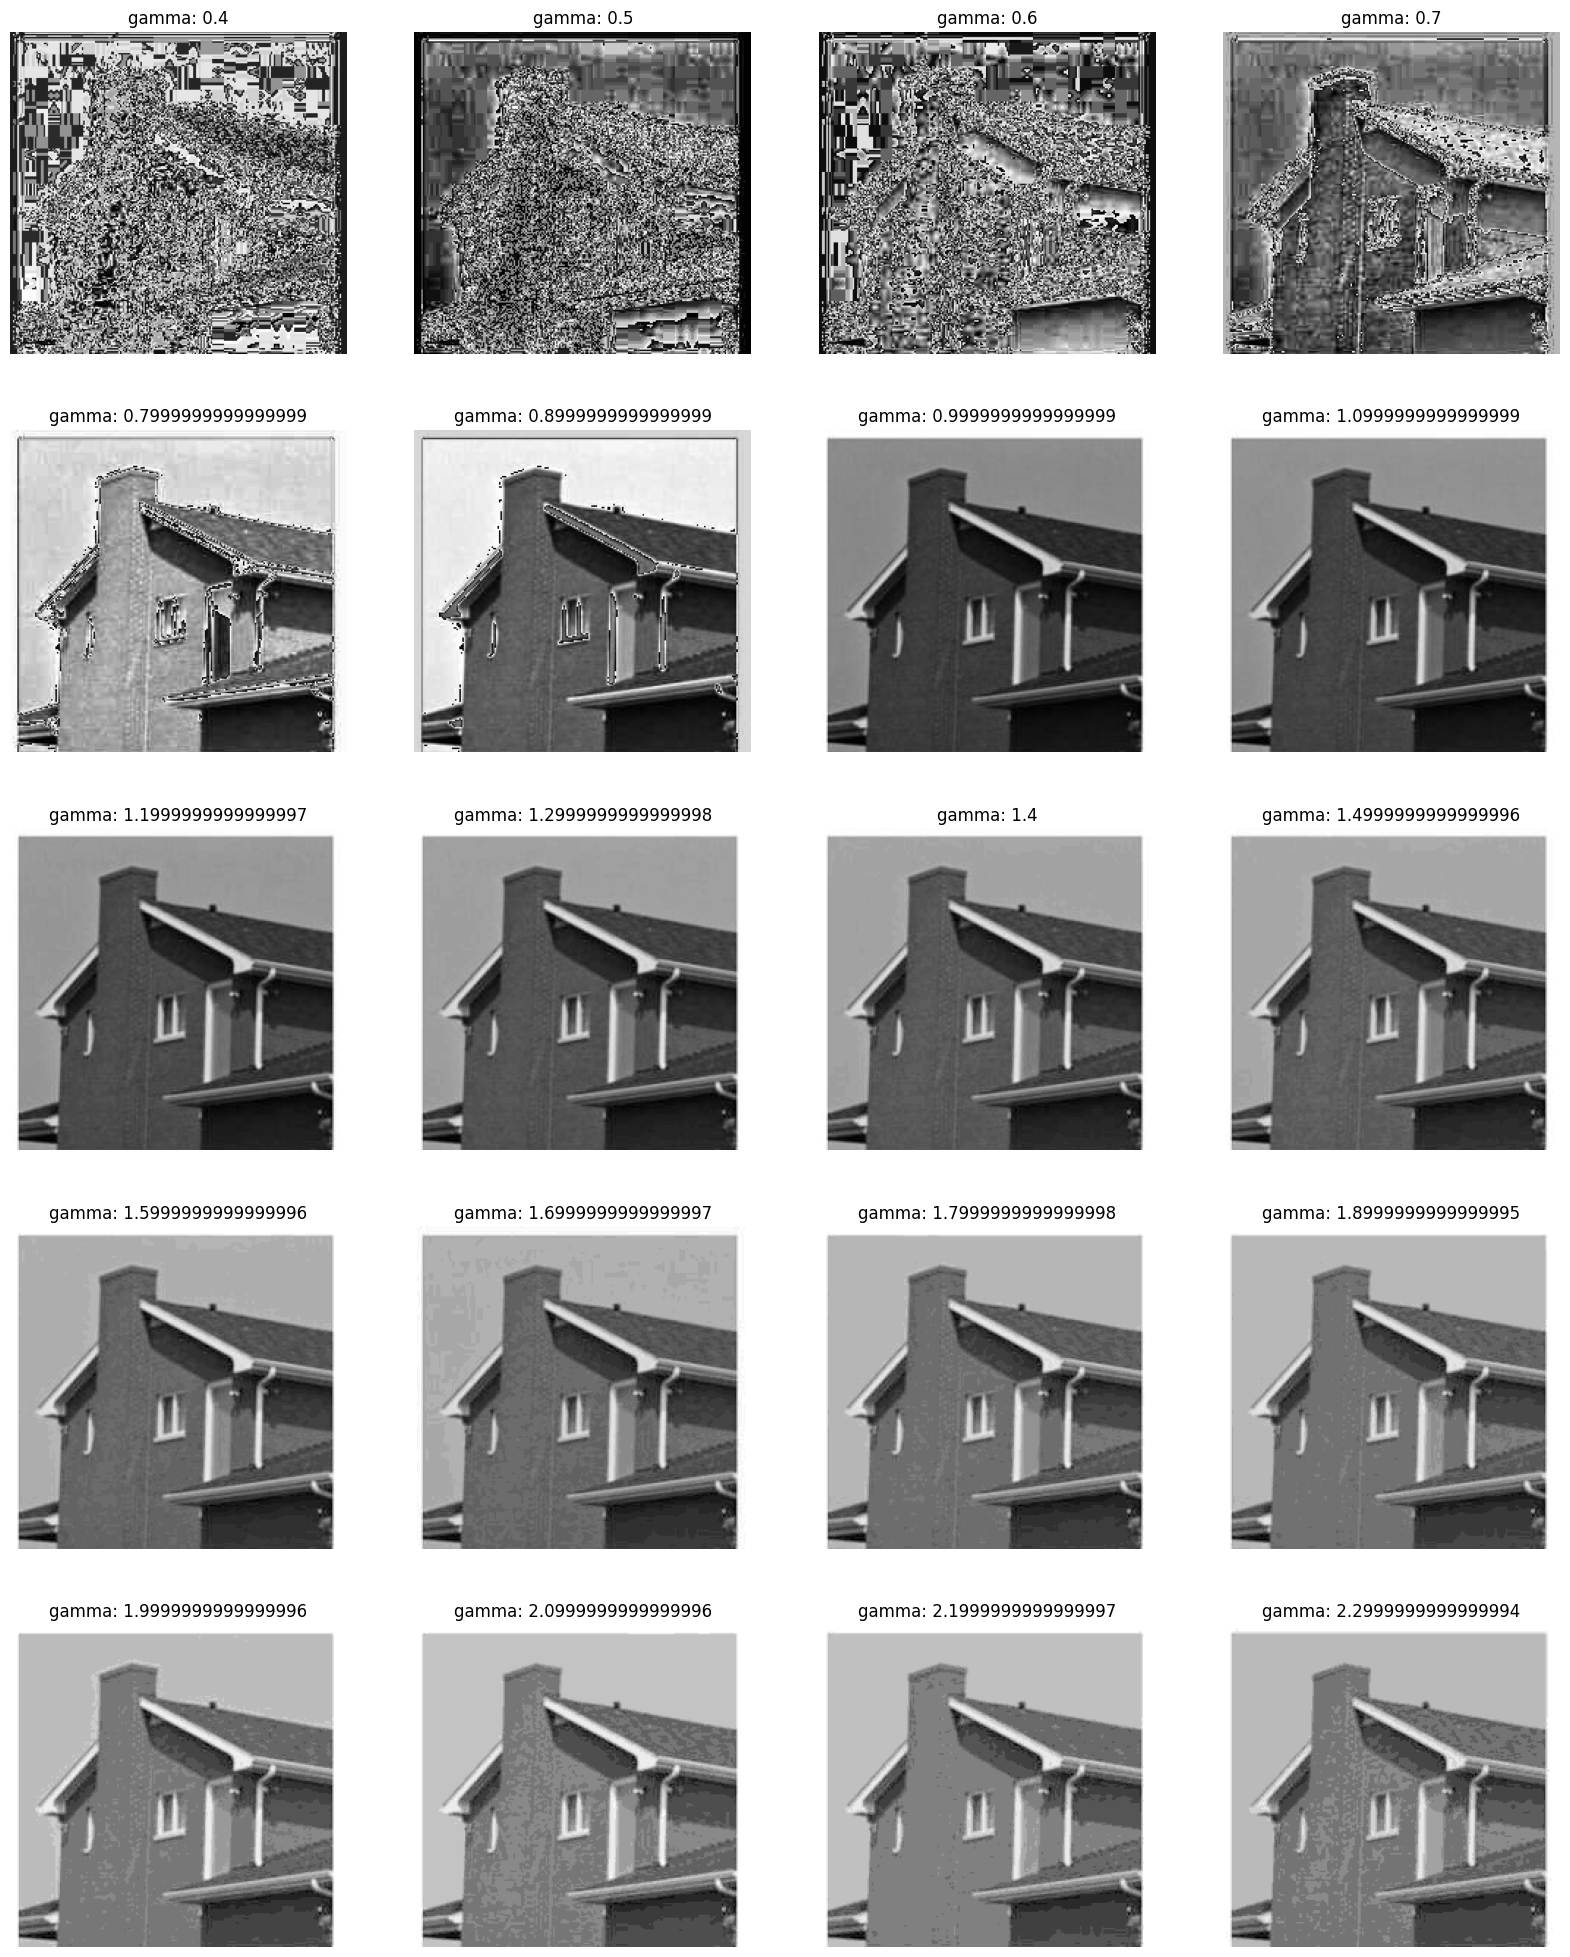

In [14]:
rows, cols = 5, 4
plt.figure(figsize=(20,25))
for i,gamma in zip( range(1,len (gammas)+1 ), gammas):
    plt.subplot (rows, cols, i)
    plt.axis (False)
    plt.title("gamma: "+str(gamma))
    temp_image = gammaCorrection(image2_2,gamma)
    plt.imshow(temp_image,cmap = "gray")
plt.show()

# سوال سوم

تصویر شکل زیر را در نظر بگیرید، مطابق تمرین قبل ابتدا 20 مقدار گامای متفاوت، را به تصویر اعمال نمائید. به نظر 
شما از این 20 تصویر بدست آمده، کدام تصویر مناسب تر است؟ در مرحله بعد، تصویر را اصالح گامای محلی نمائید. برای 
این کار تصویر را به چند ناحیه تقسیم کنید و به هر ناحیه، یک گامای مناسب اعمال کنید؟

## Visualization

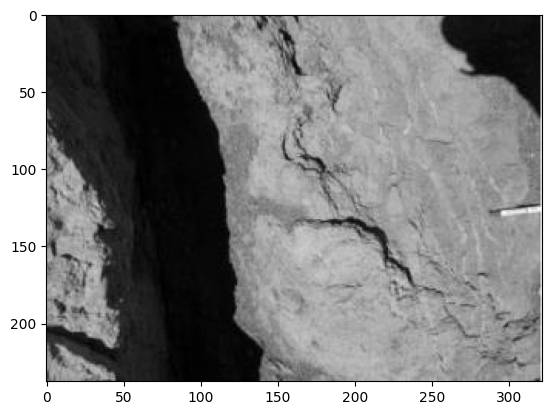

In [15]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


IMAGE3_PATH ="/content/images/image1_3.png"
image3 = cv2.imread(IMAGE3_PATH,0)
plt.imshow(image3,cmap = "gray")
plt.show()

## Define a function for applying gamma correction

In [16]:
def gammaCorrection (image,gamma):
    out = np.zeros_like(image)
    for i in range (len(image)):
        for j in range (len(image[0])):

            out[i][j] = image[i][j]**(1/gamma)
    return out

##Gamma correction on image

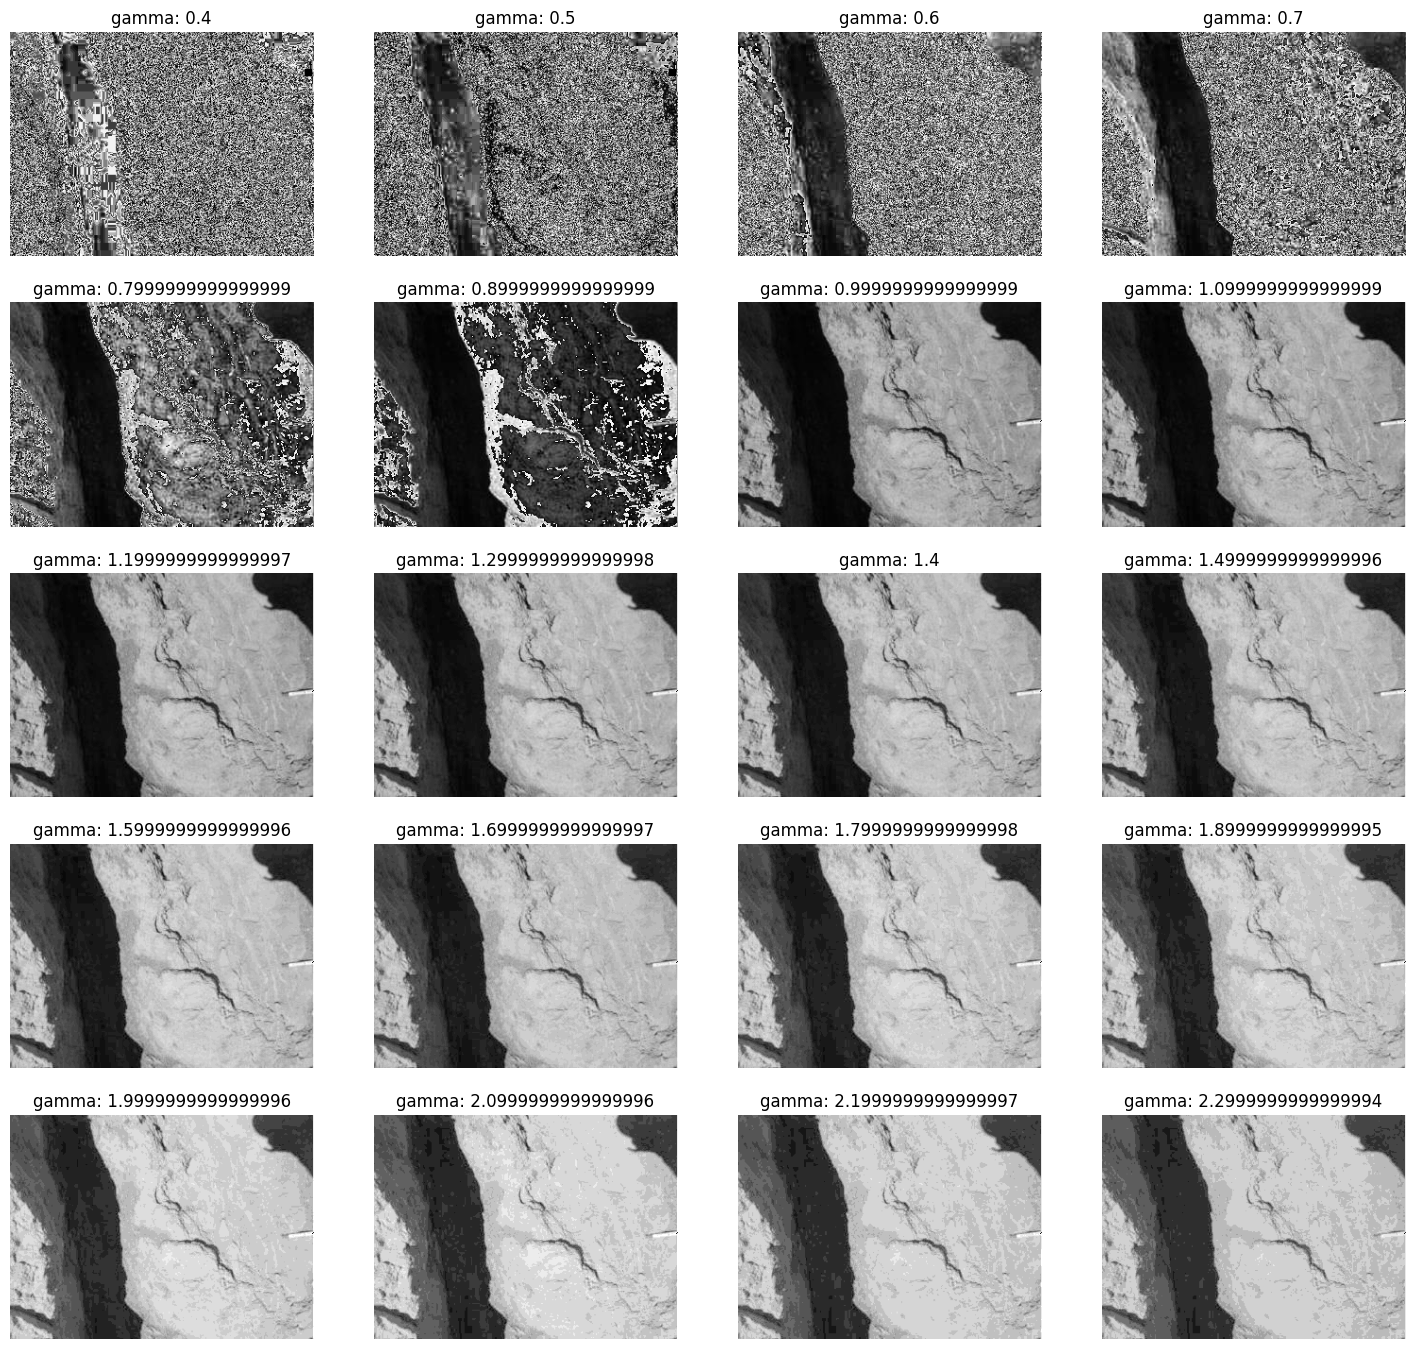

In [121]:
rows, cols = 5, 4
plt.figure(figsize=(18,17))
for i,gamma in zip( range(1,len (gammas)+1 ), gammas):
    plt.subplot (rows, cols, i)
    plt.axis (False)
    plt.title("gamma: "+str(gamma))
    temp_image = gammaCorrection(image3,gamma)
    plt.imshow(temp_image,cmap = "gray")
plt.show()

## local Gamma correction

first we find reigons based on value of each pixel
then apply gammaCorrection with different gamma values (find by experiments)


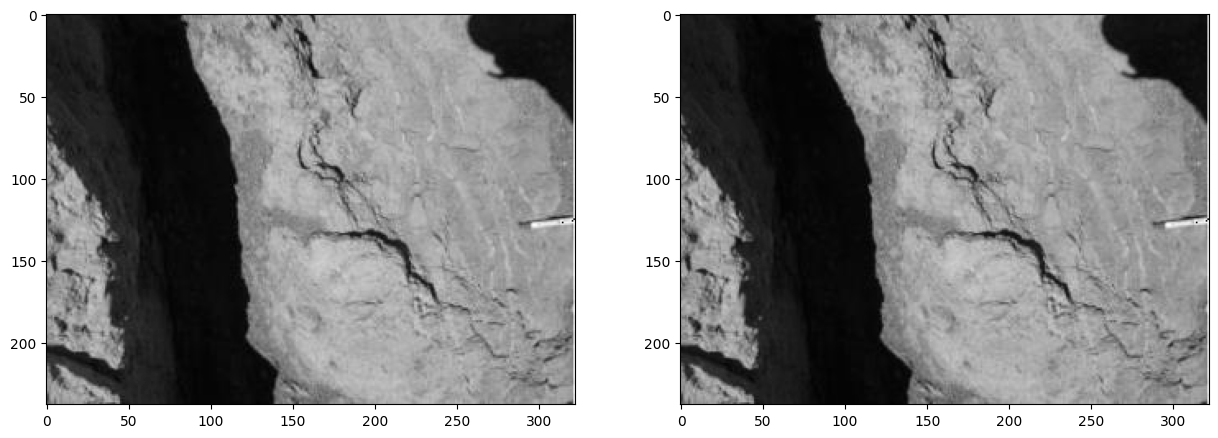

In [122]:
threshold_low_gamma = 28
threshold_high_gamma = 60
gammaDark = 0.95
gammaMedium = 0.97
gammaLight = 1.10


# image3_final = [ [ ( 0 if pixel<threshold_low_gamma else ( 128 if pixel> threshold_low_gamma and pixel < threshold_high_gamma else 255)) for pixel in row] for row in image3]
# print(np.max(image3_final),np.min(image3_final))

image3 += 1 # prevent from zero value pixels
image3_final = [ [ ( pixel**(1/gammaDark) if pixel<threshold_low_gamma else (pixel**(1/gammaMedium) if pixel> threshold_low_gamma and pixel < threshold_high_gamma else pixel**(1/gammaDark))) for pixel in row] for row in image3]

plt.figure(figsize=(15,25))
plt.subplot(1,2,1)
plt.imshow(image3, cmap="gray")

plt.subplot(1,2,2)
plt.imshow(image3_final, cmap="gray")
plt.show()

# سوال چهارم

روش برابر سازی هیستوگرام سراسری را بر روی دو تصویر نشان داده شده در شکل زیر انجام داده و هیستوگرام های
تصایور حاصل را رسم نمائید. آیا تصویر حاصل بهبود یافته است؟ یکی از روش های برابر سازی محلی را بر روی این دو
تصویر اعمال نمائید. نتایج این روش را با نتایج روش برابرسازی سراسری مقایسه نمائید. 

## Visualization

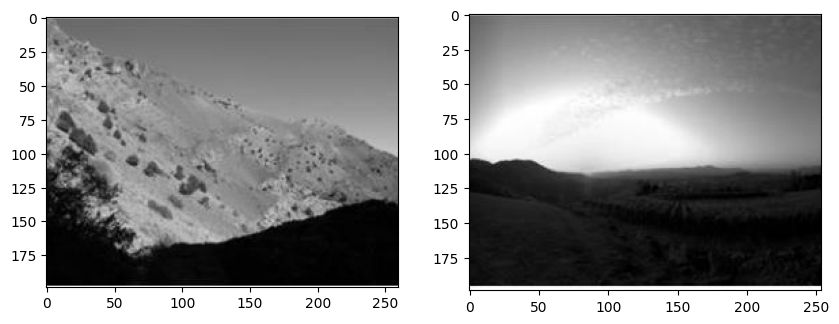

In [148]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.figure(figsize=(10,12))

IMAGE4_PATH = "/content/images/image1_4.png"
image4 = cv2.imread(IMAGE2_PATH,0)
image4_1 = image4[:,5:265]
image4_2 = image4[:,280:]
plt.subplot(1,2,1)
plt.imshow(image4_1,cmap = "gray")
plt.subplot(1,2,2)
plt.imshow(image4_2,cmap = "gray")
plt.show()

##Histogram matching

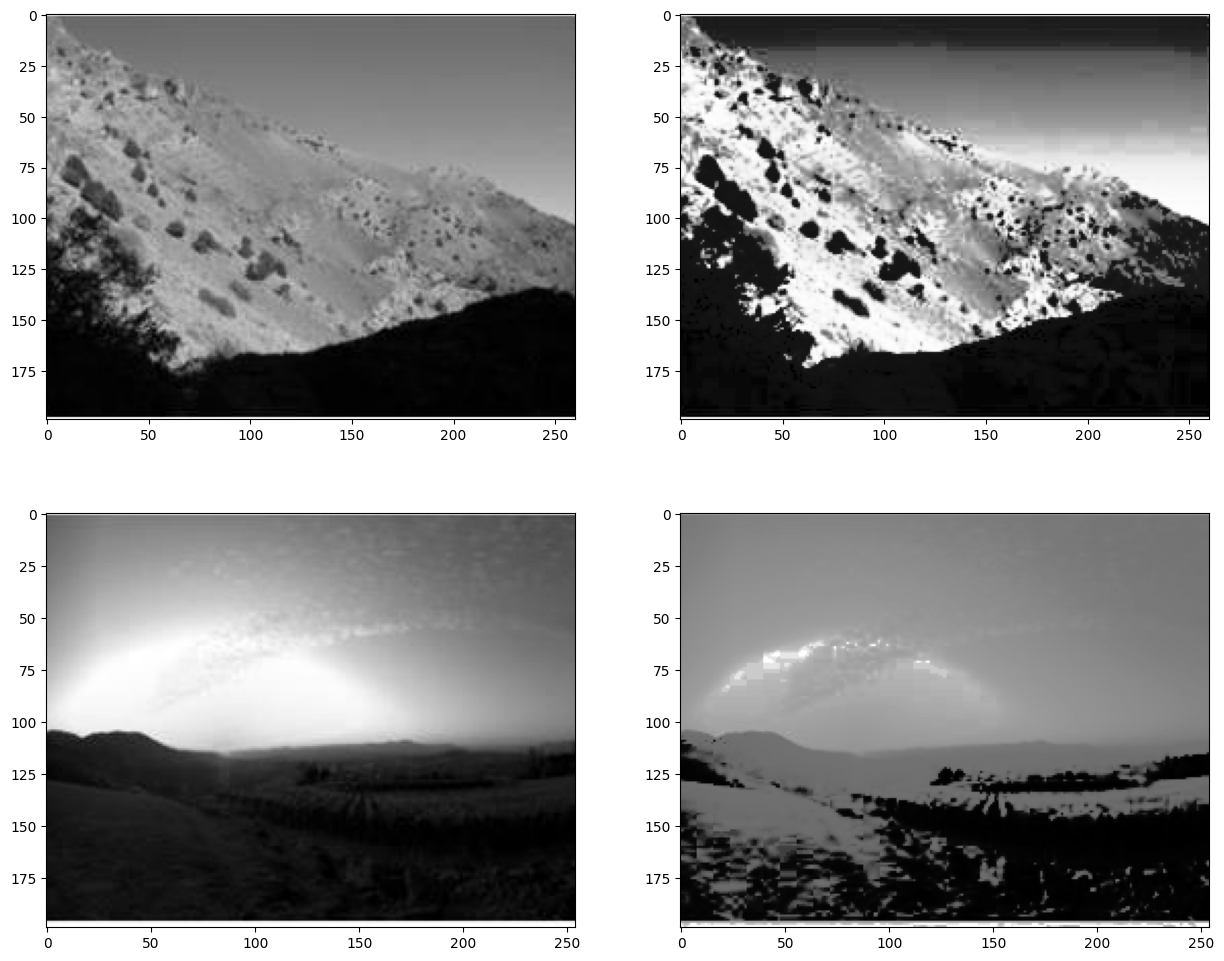

In [145]:
from skimage.exposure import match_histograms

matched1 = match_histograms(image4_1, image4_2)
matched2 = match_histograms(image4_2, image4_1)

plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.imshow(image4_1,cmap="gray")

plt.subplot(2,2,2)
plt.imshow(matched1,cmap="gray")

plt.subplot(2,2,3)
plt.imshow(image4_2,cmap="gray")

plt.subplot(2,2,4)
plt.imshow(matched2,cmap="gray")

plt.show()

## Local Histogram Matching